In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

In [3]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [4]:
df.shape

(74283, 25)

In [5]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [6]:
df.duplicated().sum()

0

In [7]:
df['Alzheimer’s Diagnosis'].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [8]:
cat = []
num = []


for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)

In [9]:
cat

['Country',
 'Gender',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [10]:
num

['Age', 'Education Level', 'BMI', 'Cognitive Test Score']

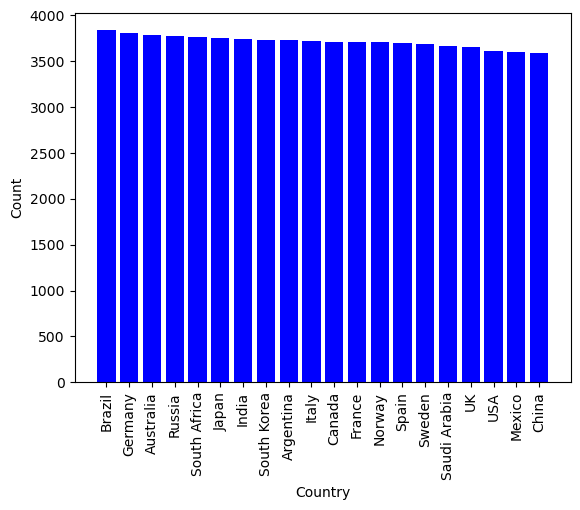

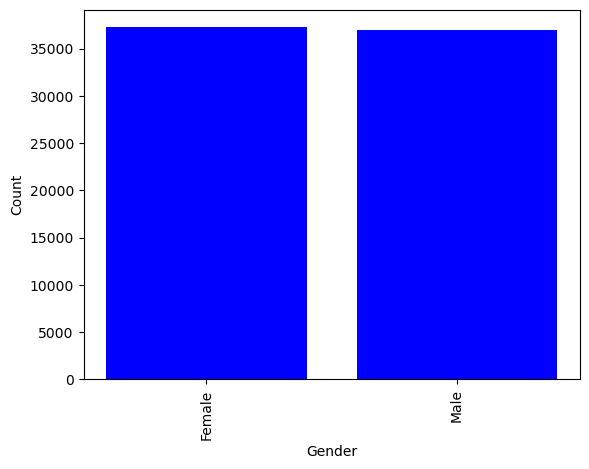

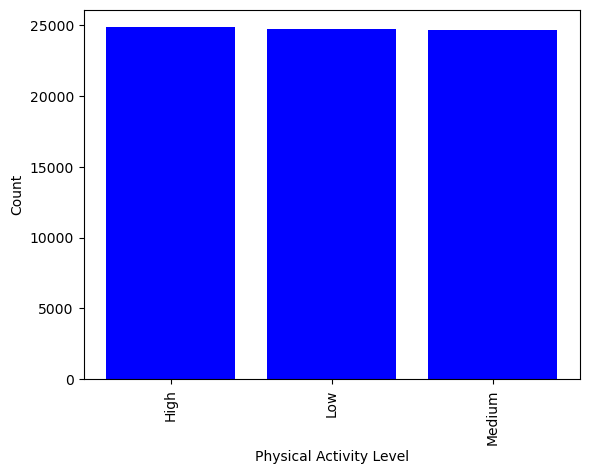

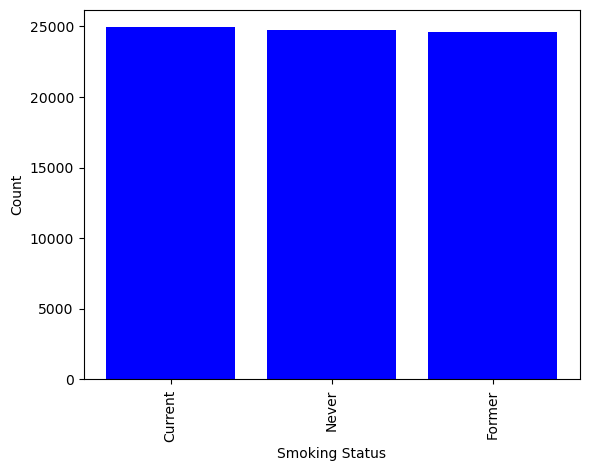

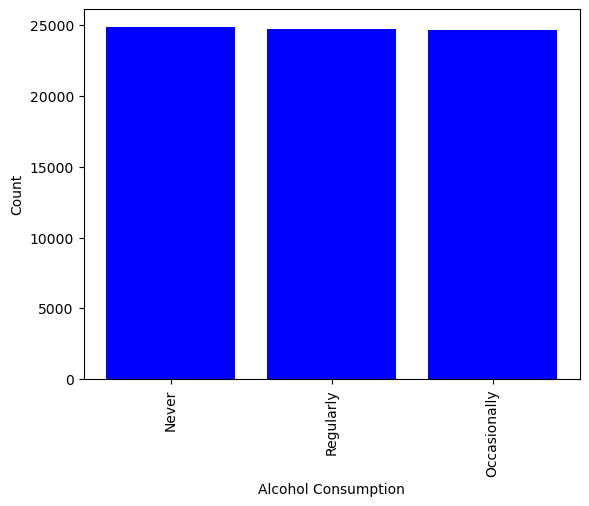

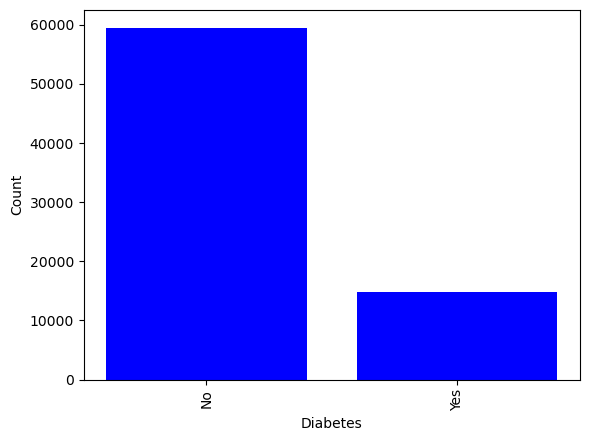

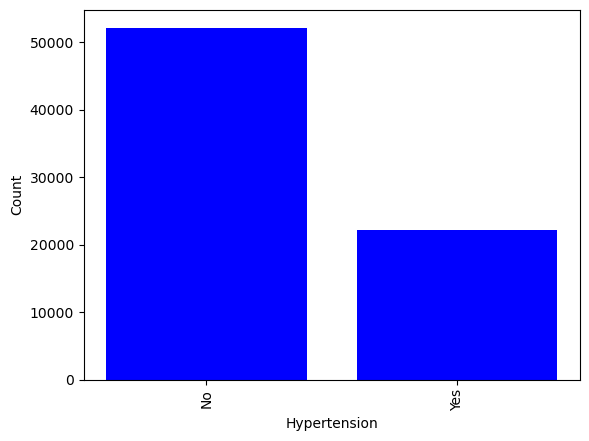

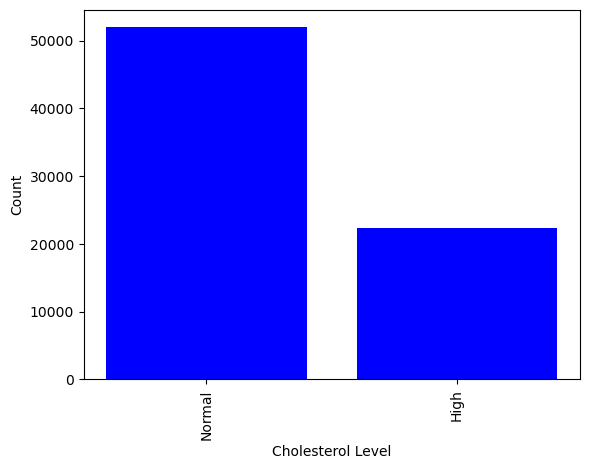

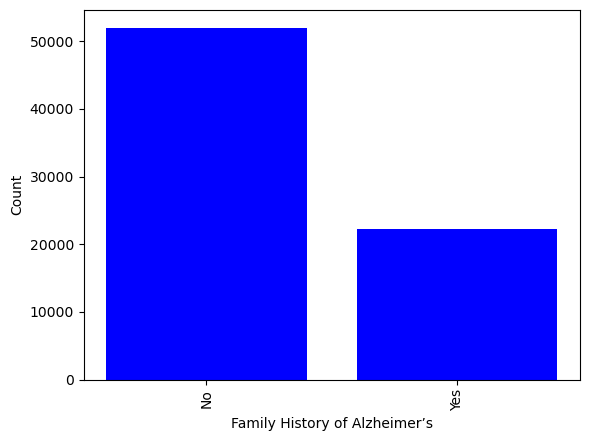

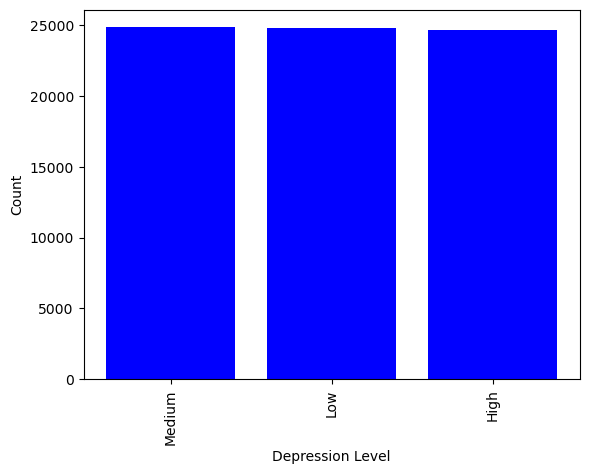

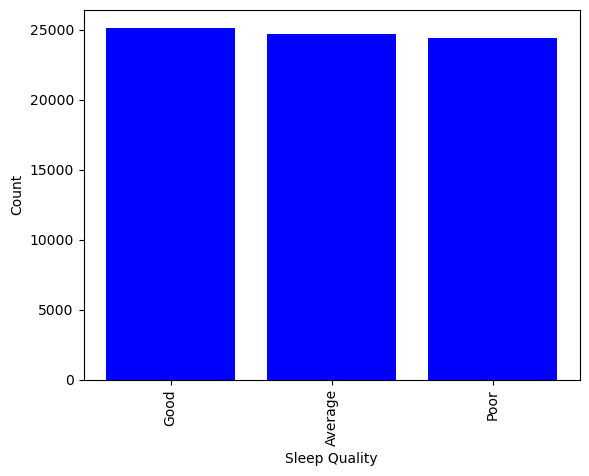

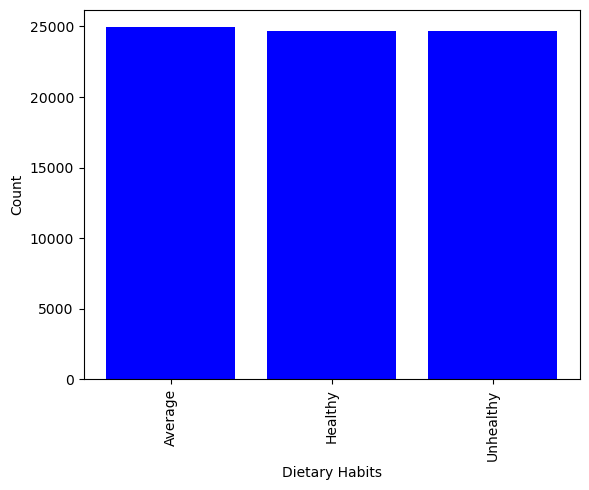

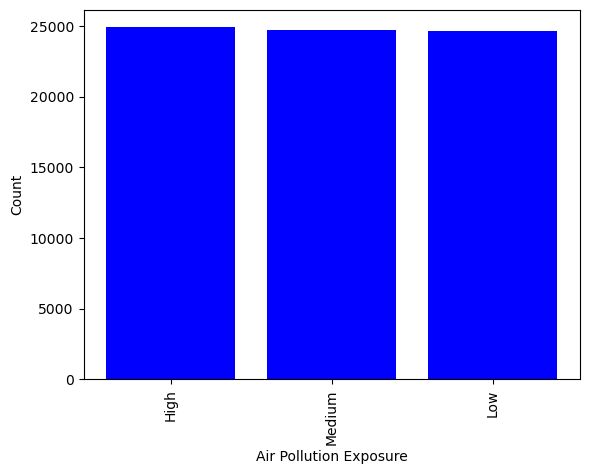

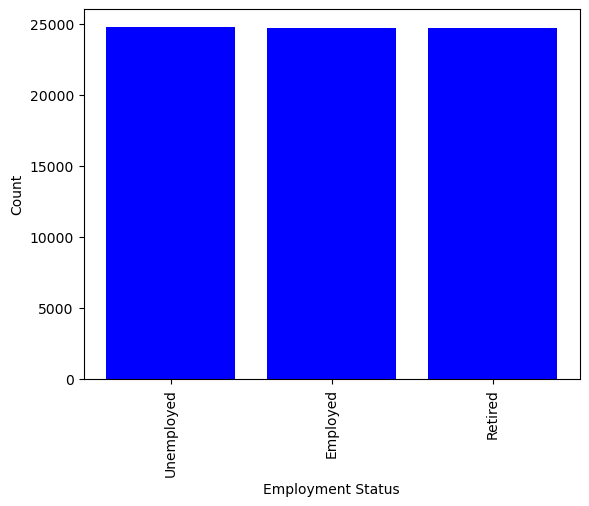

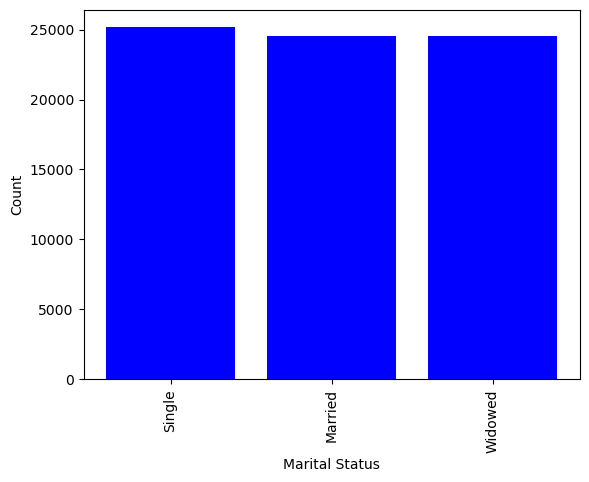

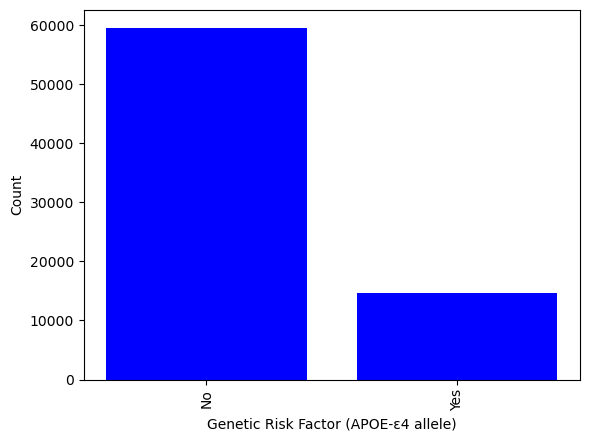

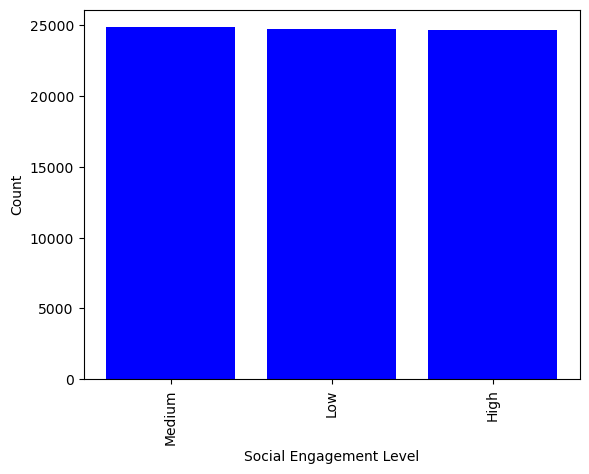

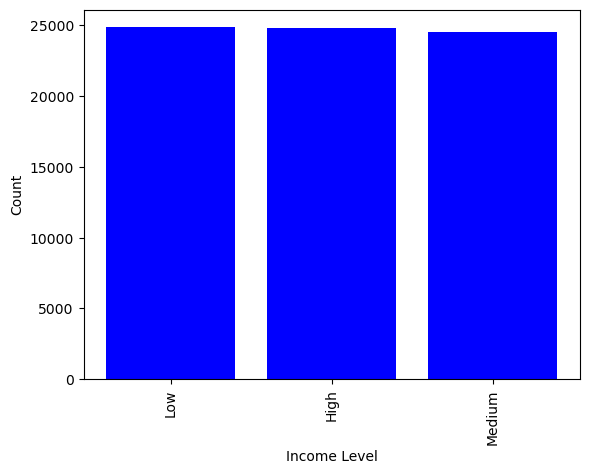

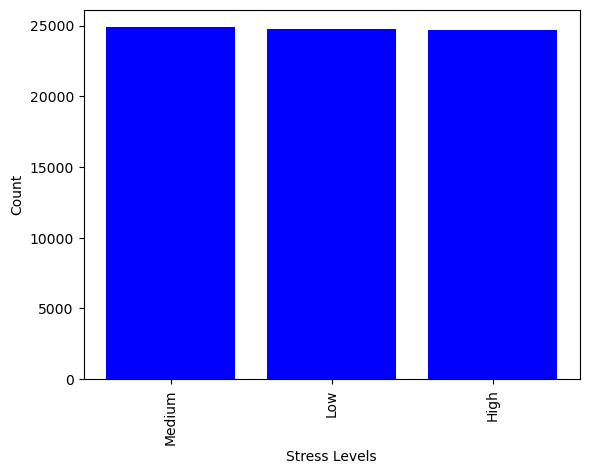

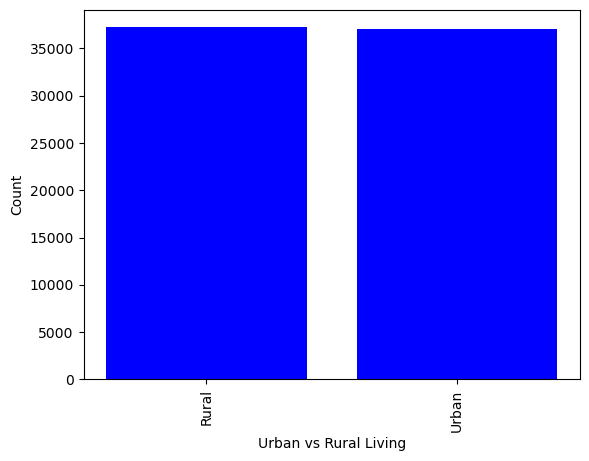

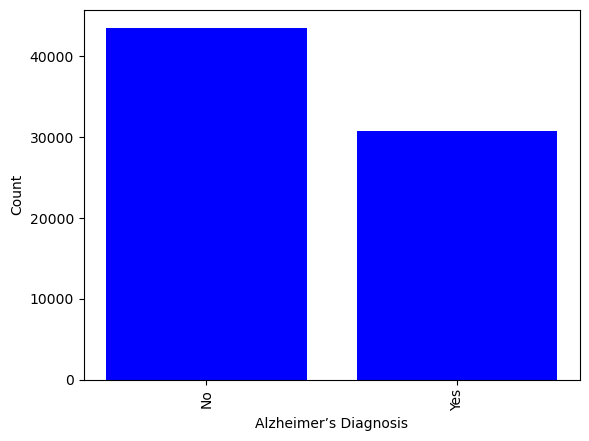

In [11]:
# Cat 

for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height = vc , color = 'b')
    plt.xlabel(i)
    plt.xticks(rotation= 90)
    plt.ylabel('Count')
    plt.show()


# country, smoking status, alcohol consumption, coholesterol - normal,high,dietery habits, employmnet status, marital status, urban vs rural
# gender,physical activity level, hypertension, family alzhemiers,depression level,sleep quality, air pollution exposure, social engagement level,income, level,stress level,alzheimers diagnosis
# drop -- genetic , diabetes

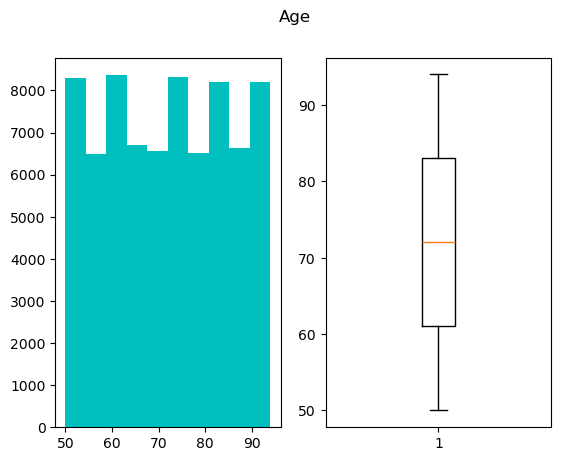

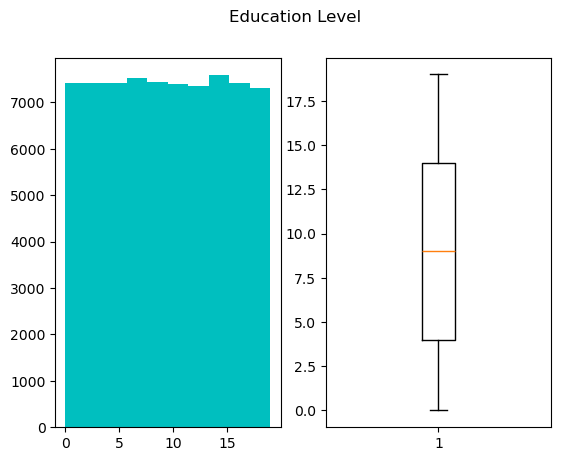

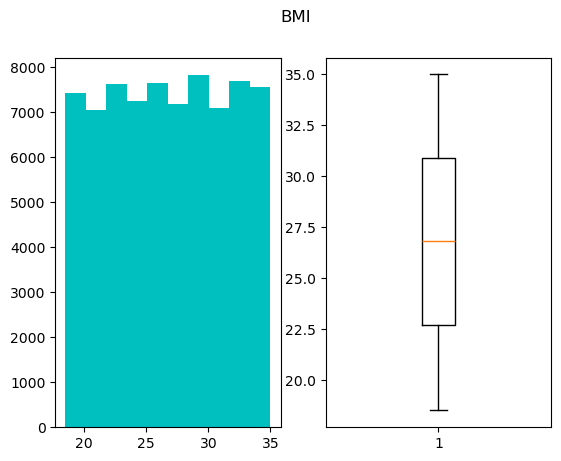

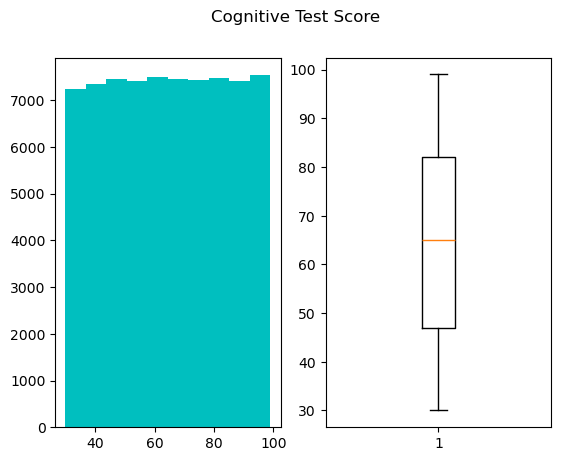

In [12]:
# Numerical

for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(df[i],color = 'c')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [13]:
df.columns


Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [14]:
# one hot encoder --- country, employmnet status, marital status,urban vs rural

# Label Encoding
# gender,physical activity level, hypertension, family alzhemiers,depression level, alcohol consumption,sleep quality, air pollution exposure, social engagement level,income, level,stress level,alzheimers diagnosis

# drop - genetic , diabetes

In [15]:
df.drop('Diabetes', axis = 1 , inplace = True)
df.drop('Genetic Risk Factor (APOE-ε4 allele)', axis = 1,inplace = True)


In [16]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Social Engagement Level', 'Income Level',
       'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis'],
      dtype='object')

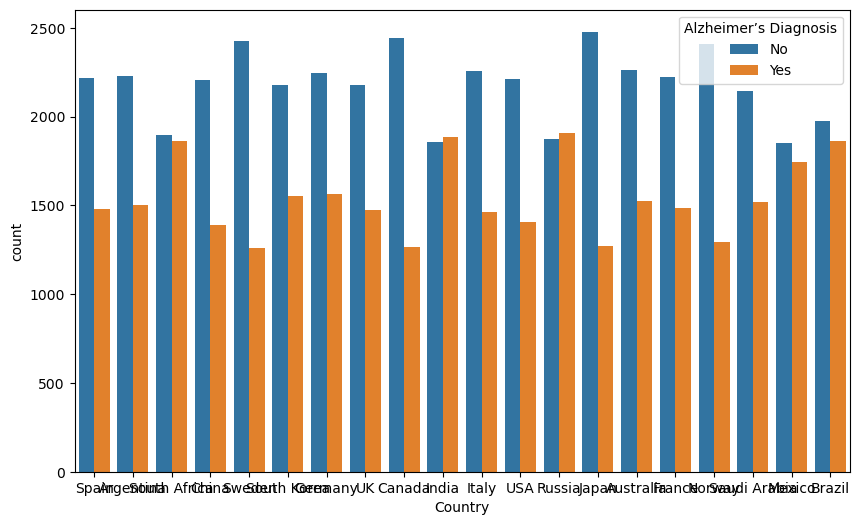

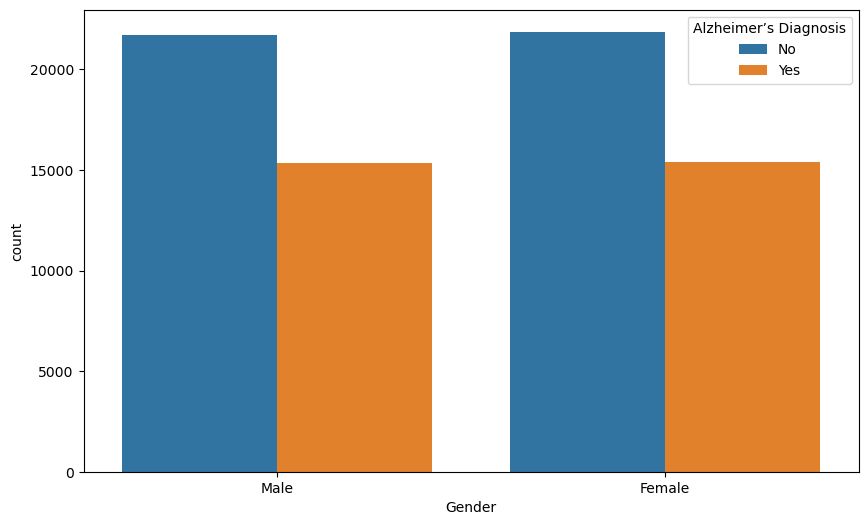

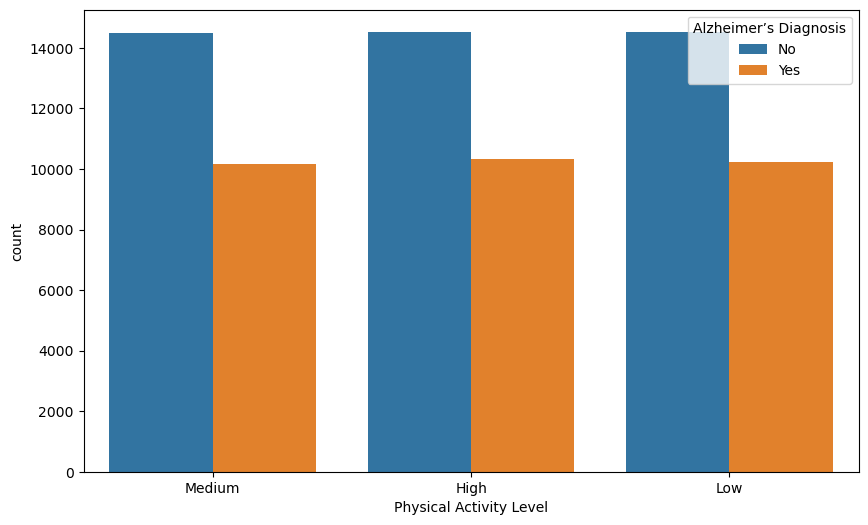

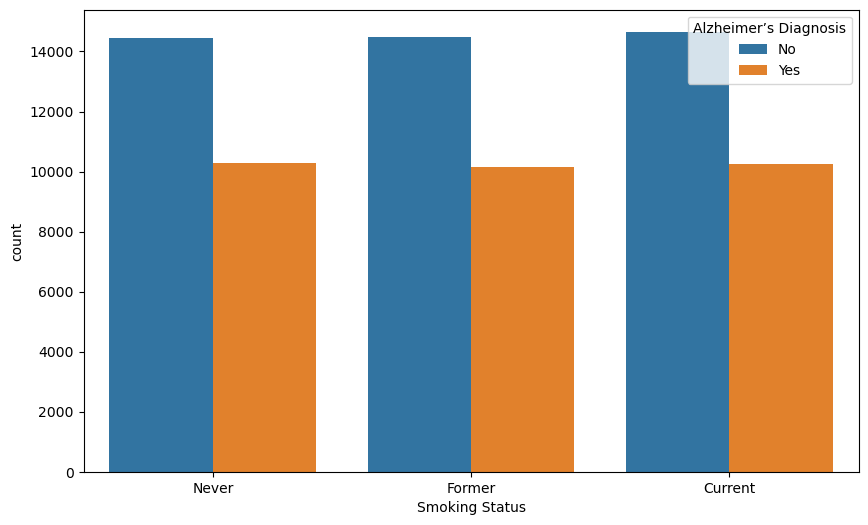

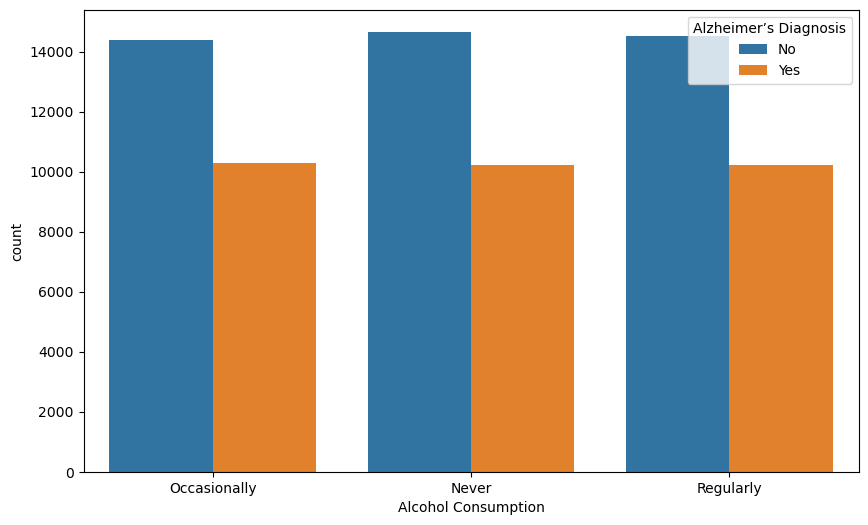

ValueError: Could not interpret input 'Diabetes'

<Figure size 1000x600 with 0 Axes>

In [17]:
import seaborn as sns
for i in cat[:-1]:
    plt.figure(figsize=(10,6))
    sns.countplot(data = df , x = i, hue = 'Alzheimer’s Diagnosis',orient = 'h', width = 0.8)
    plt.show()

In [ ]:
for i in num:
    gb = df.groupby('Alzheimer’s Diagnosis')[i].mean()
    plt.bar(x = gb.index, height = gb)
    plt.xlabel('Alzheimer’s Diagnosis')
    plt.ylabel("Average of "+str(i))
    plt.show()

In [ ]:
df['Urban vs Rural Living'].value_counts()

### gender
#### physical activity level
#### hypertension
#### family alzhemiers
#### depression level,
#### sleep quality, 
#### air pollution exposure, 
#### social engagement level,
#### income level,
#### stress level,
#### alcohol consumption
#### alzheimers diagnosis, 
#### smoking status,
#### coholesterol,dietery habits
#### Urban vs Rural living

In [ ]:
df

In [ ]:
df['Gender'].replace(to_replace = ['Female','Male'], value = [0,1], inplace = True)
df['Physical Activity Level'].replace(to_replace = ['High','Low','Medium',], value = [2,0,1], inplace = True)
df['Hypertension'].replace(to_replace = ['Yes','No'], value = [1,0], inplace = True)
df['Family History of Alzheimer’s'].replace(to_replace = ['Yes','No'], value = [1,0], inplace = True)
df['Depression Level'].replace(to_replace = ['Low','Medium','High'], value = [0,1,2], inplace = True)
df['Sleep Quality'].replace(to_replace = ['Good','Average','Poor'], value = [2,1,0], inplace = True)
df['Air Pollution Exposure'].replace(to_replace = ['Low','Medium','High'], value = [0,1,2], inplace = True)
df['Social Engagement Level'].replace(to_replace = ['Low','Medium','High'], value = [0,1,2], inplace = True)
df['Income Level'].replace(to_replace = ['Low','Medium','High'], value = [0,1,2], inplace = True)
df['Stress Levels'].replace(to_replace = ['Low','Medium','High'], value = [0,1,2], inplace = True)
df['Alcohol Consumption'].replace(to_replace = ['Never','Occasionally','Regularly'], value = [0,1,2], inplace = True)
df['Alzheimer’s Diagnosis'].replace(to_replace = ['Yes','No'], value = [1,0], inplace = True)
df['Smoking Status'].replace(to_replace = ['Never','Current','Former'], value = [0,1,2], inplace = True)
df['Cholesterol Level'].replace(to_replace = ['Normal','High'], value = [0,1], inplace = True)
df['Dietary Habits'].replace(to_replace = ['Unhealthy','Average','Healthy'] , value = [0,1,2], inplace = True)
df['Urban vs Rural Living'].replace(to_replace = ['Urban','Rural'] , value = [1,0], inplace = True)

In [ ]:
df.columns


In [ ]:
# One Hot Encoding
# country, 
# employmnet status, 
# marital status

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output = False)
country = ohe.fit_transform(df[['Country']])
country

In [ ]:
ohe.categories_

In [ ]:
country_df = pd.DataFrame(country , columns = ohe.categories_)

In [ ]:
country_df.drop('China', axis = 1, inplace = True)

In [ ]:
country_df

In [ ]:
df = pd.concat([df,country_df], axis = 1)

In [ ]:
df

In [ ]:
df['Employment Status'].value_counts()

In [ ]:
ohe = OneHotEncoder( sparse_output = False)
emp = ohe.fit_transform(df[['Employment Status']])
emp

In [ ]:
ohe.categories_

In [ ]:
emp_df = pd.DataFrame( emp , columns = ohe.categories_)

In [ ]:
emp_df.drop('Unemployed', axis = 1 , inplace = True)

In [ ]:
emp_df

In [ ]:
df = pd.concat([df,emp_df], axis = 1)

In [ ]:
df

In [ ]:
df['Marital Status'].value_counts()

In [ ]:
ohe = OneHotEncoder( sparse_output = False)
marital = ohe.fit_transform(df[['Marital Status']])
marital

In [ ]:
ohe.categories_

In [ ]:
marital_df = pd.DataFrame( marital , columns = ohe.categories_)


In [ ]:
marital_df

In [ ]:
marital_df.drop('Widowed', axis = 1 , inplace = True)

In [ ]:
marital_df

In [ ]:
df = pd.concat([df,marital_df], axis = 1)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
X_df = df.drop(['Alzheimer’s Diagnosis','Country','Employment Status','Marital Status'] , axis = 1)
y = df['Alzheimer’s Diagnosis']
X_df

In [ ]:
X = X_df.values

In [ ]:
Y = y.values

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report ,accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
print("Model Performance: ")
print("Training accuracy: ",accuracy_score(y_train,y_train_predicted))
print("Training precision: ", precision_score(y_train, y_train_predicted))
print("Training recall: ", recall_score(y_train, y_train_predicted))
print(confusion_matrix(y_train, y_train_predicted))
print("Training classification report: ",classification_report(y_train, y_train_predicted))

In [ ]:
# Test 

#  Accuracy > 80% 

print("Model Performance: ")
print("Testing accuracy: ",accuracy_score(y_test,y_test_predicted))
print("Testing precision: ", precision_score(y_test,y_test_predicted))
print("Testing recall: ", recall_score(y_test,y_test_predicted))
print(confusion_matrix(y_test,y_test_predicted))
print("Testing classification report: ",classification_report(y_test,y_test_predicted))


In [ ]:
x_train

In [ ]:
y_train

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(5)
knn_model.fit(x_train, y_train)
ytrain_knn_predicted = knn_model.predict(x_train)
ytrain_knn_predicted

In [ ]:
y_train

In [ ]:
print("Model Performance: ")
print("Training accuracy: ",accuracy_score(y_train,ytrain_knn_predicted))
print("Training precision: ", precision_score(y_train, ytrain_knn_predicted))
print("Training recall: ", recall_score(y_train, ytrain_knn_predicted))
print(confusion_matrix(y_train, ytrain_knn_predicted))
print("Training classification report: ",classification_report(y_train,ytrain_knn_predicted))

In [ ]:
y_test_knn_predicted = knn_model.predict(x_test)
y_test_knn_predicted

In [ ]:
# Test 

#  Accuracy > 80% 

print("Model Performance: ")
print("Testing accuracy: ",accuracy_score(y_test,y_test_knn_predicted))
print("Testing precision: ", precision_score(y_test,y_test_knn_predicted))
print("Testing recall: ", recall_score(y_test,y_test_knn_predicted))
print(confusion_matrix(y_test,y_test_knn_predicted))
print("Testing classification report: ",classification_report(y_test,y_test_knn_predicted))


## Decision tree classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree= DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)
y_train_predicted= dtree.predict(X_train)
y_test_predicted= dtree.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train, y_train_predicted))
# print("Training precsision: ", precision_score(y_train, y_train_predicted))
# print("Training recall: ", recall_score(y_train, y_train_predicted))
print(confusion_matrix(y_train, y_train_predicted))
print(classification_report(y_train, y_train_predicted))


In [ ]:
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
# print("Training precsision: ", precision_score(y_train, y_train_predicted))
# print("Training recall: ", recall_score(y_train, y_train_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()

print()

print(classification_report(y_test, y_test_predicted))

## Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
y_train_rf_predicted = rf.predict(x_train)

In [ ]:
y_test_rf_predicted = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score ,confusion_matrix

In [ ]:
print('Model Performance')
print('Training Accuracy:', accuracy_score(y_train,y_train_rf_predicted))
#print('Training Precision:', precision_score(y_train,y_train_predicted))
#print('Training Recall:',recall_score(y_train,y_train_predicted))
print('Training Confusion Matrix: ', confusion_matrix(y_train,y_train_rf_predicted))
print('Training classifiation_report:',classification_report(y_train,y_train_rf_predicted))

In [ ]:
print('Model Performance')
print('Testing Accuracy:', accuracy_score(y_test,y_test_rf_predicted))
#print('Testing Precision:', precision_score(y_test,y_test_predicted))
#print('Testing Recall:',recall_score(y_test,y_test_predicted))
print('Testing Confusion Matrix: ', confusion_matrix(y_test,y_test_rf_predicted))
print('Testing classifiation_report:',classification_report(y_test,y_test_rf_predicted))

# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_train_svm_predicted = svc.predict(x_train)
y_test_svm_predicted = svc.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score ,confusion_matrix

print('Model Performance')
print('Training Accuracy:', accuracy_score(y_train,y_train_svm_predicted))
#print('Training Precision:', precision_score(y_train,y_train_predicted))
#print('Training Recall:',recall_score(y_train,y_train_predicted))
print('Training Confusion Matrix: ', confusion_matrix(y_train,y_train_svm_predicted))
print('Training classifiation_report:',classification_report(y_train,y_train_svm_predicted))

In [ ]:
print('Model Performance')
print('Testing Accuracy:', accuracy_score(y_test,y_test_svm_predicted))
#print('Testing Precision:', precision_score(y_test,y_test_predicted))
#print('Testing Recall:',recall_score(y_test,y_test_predicted))
print('Testing Confusion Matrix: ', confusion_matrix(y_test,y_test_svm_predicted))
print('Testing classifiation_report:',classification_report(y_test,y_test_svm_predicted))

In [ ]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()


In [ ]:
ensemble_classifier = VotingClassifier(
    estimators = [ ('lr', model1), ('dt',model2), ('svc',model3)], voting = 'hard'
)

In [ ]:
ensemble_classifier.fit(x_train, y_train)
y_train_predicted= ensemble_classifier.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("Model Performance")
print("Training accuracy: ", accuracy_score(y_test, y_test_predicted))
# print("Testing precsision: ", precision_score(y_test, y_test_predicted))
# print("Testing recall: ", recall_score(y_test, y_test_predicted))
print(confusion_matrix(y_test, y_test_predicted))
print(classification_report(y_test, y_test_predicted))